## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

np.random.seed(88)

In [2]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [3]:
light = pd.read_csv("datasets/st1/michelson_speed_of_light.csv")
light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,5-Jun,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.1,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.5,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [4]:
speed = light["velocity of light in air (km/s)"]
speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

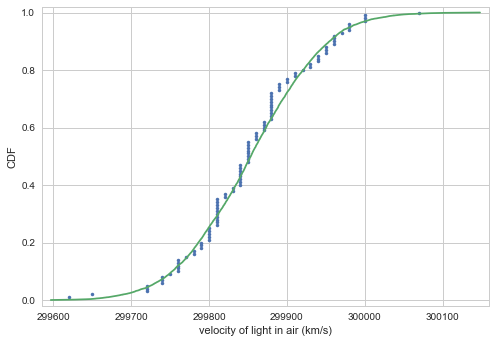

In [5]:
mean = np.mean(speed)
std = np.std(speed)

samples = np.random.normal(mean, std, size = 10000)

x, y = ecdf(speed)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.plot(x_theory, y_theory)

_ = plt.xlabel("velocity of light in air (km/s)")
_ = plt.ylabel("CDF")

plt.margins(0.02)
plt.show()

Optimal parameters are parameter values that bring the model in closest agreement with the data.

### Linear regression by least squares

* Least squares: The process of finding the parameters for which the sum of the squares of the residuals is minimal.

In [6]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [7]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

In [8]:
slope, intercept = np.polyfit(total_votes, dem_share, 1)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 3.37055368645e-05
Intercept: 40.8087905358


In [9]:
litfert = pd.read_csv("datasets/st2/female_literacy_fertility.csv")

In [10]:
litfert["illiteracy"] = 100 - litfert["female literacy"]
litfert.head()

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


In [11]:
illiteracy = litfert["illiteracy"]
fertility = litfert["fertility"]

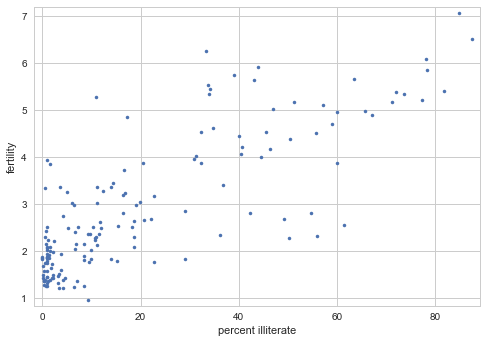

In [12]:
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")

plt.margins(0.02)

plt.show()

In [13]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [14]:
print(pearson_r(illiteracy, fertility))

0.804132402682


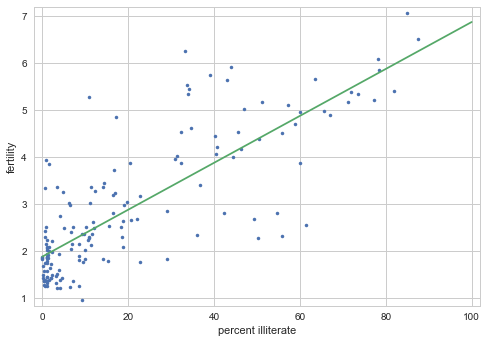

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

## How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares).

Plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

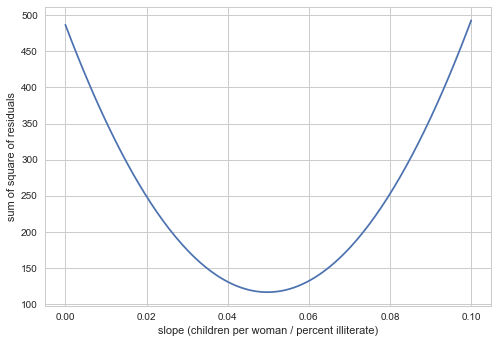

In [16]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200) # slopes

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. 

This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. 

### Bootstrapping

* The use of resampled data to perform statistical inference. Sampling with replacement. 
* Each resampled array is called a bootstrampped sample. 
* A bootstrap replicate is a statistic computed from a resampled array. 

In [17]:
data = [1, 2, 3, 4, 5]
np.random.choice(data, size = 5)

array([1, 4, 2, 4, 3])

In [20]:
bs_sample = np.random.choice(speed, size = 100)

In [21]:
np.mean(bs_sample)

299853.5

In [22]:
np.median(bs_sample)

299850.0

In [23]:
np.std(bs_sample)

77.335308882812384

In [28]:
def bootstrap_replicate_1d(data, func):
    # generate bootstrap replicate of 1-dimensional data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [29]:
bootstrap_replicate_1d(speed, np.mean)

299857.79999999999

In [30]:
bootstrap_replicate_1d(speed, np.std)

73.338325587648924

In [31]:
bootstrap_replicate_1d(speed, np.median)

299870.0

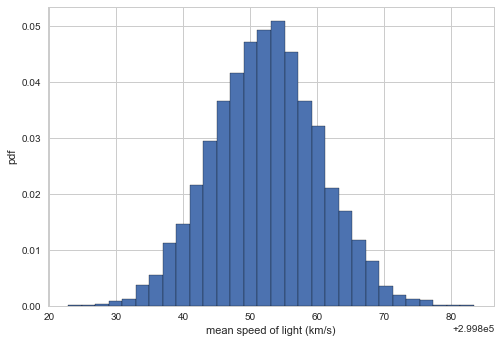

In [32]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(speed, np.mean)
    
_ = plt.hist(bs_replicates, bins = 30, normed = True)
_ = plt.xlabel("mean speed of light (km/s)")
_ = plt.ylabel("pdf")
plt.show()

### Confidence interval of a statistic

If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval. 

In [35]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval
conf_int

array([ 299837.,  299868.])

In [40]:
def draw_bs_reps(data, func, size = 1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Here, we'll compute the bootstrap estimate of the probability distribution function of the mean speed of light. This is a probabilistic estimate of the mean. 

SEM: 7.86145024789
Bootstrap Std: 7.84984746042


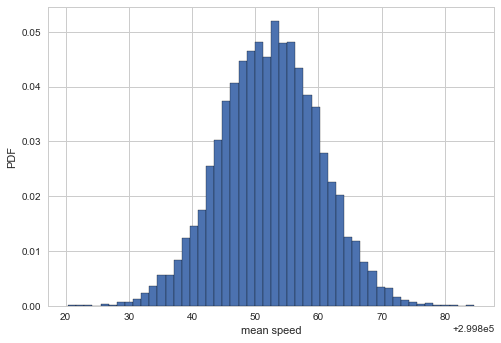

In [39]:
# take 10,000 bootstrap replicates of the mean:
bs_replicates = draw_bs_reps(speed, np.mean, size = 10000)

# compute and print SEM
# The standard deviation of this distribution, 
# called the standard error of the mean, or SEM, is given 
# by the standard deviation of the data divided by the 
# square root of the number of data points.
sem = np.std(speed) / np.sqrt(len(speed))
print("SEM:", sem)

# compute the std of the bootstrap reps
bs_std = np.std(bs_replicates)
print("Bootstrap Std:", bs_std)

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("mean speed")
_ = plt.ylabel("PDF")

plt.show()

Notice that the SEM that we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

#### Confidence intervals

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

In [41]:
np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval

array([ 299836.8,  299867.6])

### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: we can always take bootstrap replicates!

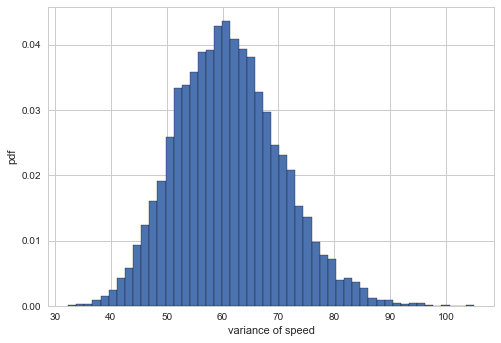

In [43]:
bs_replicates = draw_bs_reps(speed, np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("variance of speed")
_ = plt.ylabel("pdf")
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

In [44]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [ 44.341      81.2005375]
